In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

keys = ['business','entertainment','politics','sport','tech']
dataset = {}
for key in keys:
    df = pd.read_pickle("/content/drive/MyDrive/bbc with label/train_df_label_"+key+".pickle" )
    df_result = df[['Text', 'Summary', 'text_clean', "summary_clean", "labels", "labels_idx_list"]].copy()
    dataset[key] = df_result[:360]

dataset["business"].tail()

,Text,Summary,text_clean,summary_clean,labels,labels_idx_list
355,South Korea will boost state spending next ye...,"""The focus will be on job creation and economi...",[ South Korea will boost state spending next y...,"[""The focus will be on job creation and econom...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[0, 4, 5, 7, 12, 15, 16, 19]"
356,"The Open Society Institute (OSI), financed by...","The Open Society Institute (OSI), financed by ...","[ The Open Society Institute (OSI), financed b...","[The Open Society Institute (OSI), financed by...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0, 2, 4, 6, 8, 9]"
357,German investment bank Deutsche Bank has chal...,Deutsche Bank contends Yukos filed for bankrup...,[ German investment bank Deutsche Bank has cha...,[Deutsche Bank contends Yukos filed for bankru...,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0, 2, 5, 9, 13, 14, 15]"
358,Fiat will meet car giant General Motors (GM) ...,Fiat claims that GM is legally obliged to buy ...,[ Fiat will meet car giant General Motors (GM)...,[Fiat claims that GM is legally obliged to buy...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1, 8, 9, 13]"
359,Chile's copper industry has registered record...,Chile's copper industry has registered record ...,[ Chile's copper industry has registered recor...,[Chile's copper industry has registered record...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0, 7, 10]"


In [3]:
df_all_doc = pd.read_pickle("/content/drive/MyDrive/train df not shuffle/train_df_not_shuffle.pickle" )
df_all_doc.tail()

,Text,Category,text_clean
2220,Top-seeded Americans Andy Roddick and Andre A...,sport,[ Top-seeded Americans Andy Roddick and Andre ...
2221,Unseeded Nicolas Almagro became the fifth Spa...,sport,[ Unseeded Nicolas Almagro became the fifth Sp...
2222,Second seed Andre Agassi suffered a comprehen...,sport,[ Second seed Andre Agassi suffered a comprehe...
2223,Teenager Sania Mirza completed a superb week ...,sport,[ Teenager Sania Mirza completed a superb week...
2224,Andy Roddick will play Cyril Saulnier in the ...,sport,[ Andy Roddick will play Cyril Saulnier in the...


In [4]:
X_all_doc = df_all_doc["Text"]
X_all_doc = np.array(X_all_doc)
len(X_all_doc)

2225

In [5]:
import tensorflow as tf
import keras
text_vectorizer = keras.layers.TextVectorization(max_tokens=34500, standardize="lower_and_strip_punctuation",
                                                 split="whitespace", output_mode="int", output_sequence_length=500)

text_vectorizer.adapt(X_all_doc, batch_size=2225)

vocab = text_vectorizer.get_vocabulary()
print("Vocab : {}".format(vocab[:10]))
print("Vocab Size : {}".format(text_vectorizer.vocabulary_size()))


Vocab : ['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'in', 'for', 'is']
Vocab Size : 34422


In [6]:
out = text_vectorizer(X_all_doc[:1])
print(type(out))
print(len(X_all_doc[:1][0].split(" ")))
print("Output Shape : {}".format(out.shape))
print(np.array(out)[0][41])

<class 'tensorflow.python.framework.ops.EagerTensor'>
412
Output Shape : (1, 500)
583


In [7]:
keys = ['business','entertainment','politics','sport','tech']
#key_idx = {'business': 1,'entertainment': 2,'politics': 3,'sport': 4,'tech': 5}
for key in keys:
    df_category = dataset[key]
    vectorized_text_list = []
    for i in range(len(df_category)):
        vectorized_text = text_vectorizer(df_category.iloc[i]["text_clean"])
        vectorized_text = np.array(vectorized_text)

        vectorized_text_list.append(vectorized_text)
    df_category["text_embedding"] = vectorized_text_list

dataset["sport"].head()

<ipython-input-7-b4c3b787d302>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category["text_embedding"] = vectorized_text_list


,Text,Summary,text_clean,summary_clean,labels,labels_idx_list,text_embedding
0,British hurdler Sarah Claxton is confident sh...,"For the first time, Claxton has only been prep...",[ British hurdler Sarah Claxton is confident s...,"[For the first time, Claxton has only been pre...","[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0, 2, 6, 9, 11]","[[157, 12262, 4798, 6860, 9, 1118, 74, 57, 141..."
1,Sonia O'Sullivan has indicated that she would...,"The participation of O'Sullivan, currentily tr...",[ Sonia O'Sullivan has indicated that she woul...,"[The participation of O'Sullivan, currentily t...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]","[3, 4, 6]","[[9054, 3111, 19, 2819, 10, 74, 38, 93, 3, 773..."
2,Maurice Greene aims to wipe out the pain of l...,I think when I was coming up I would say there...,[ Maurice Greene aims to wipe out the pain of ...,[I think when I was coming up I would say ther...,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0, 3, 3, 3, 4, 8, 9, 10, 11, 13, 14, 21, 21]","[[6277, 5361, 2284, 3, 6955, 56, 2, 4833, 4, 1..."
3,The IAAF - athletics' world governing body - ...,"""I am very happy to see you all, members of th...",[ The IAAF - athletics' world governing body -...,"[""I am very happy to see you all, members of t...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[0, 3, 6, 8]","[[2, 1902, 1595, 77, 3128, 951, 19, 997, 3914,..."
4,Ethiopia's Tirunesh Dibaba set a new world re...,Ethiopia's Tirunesh Dibaba set a new world rec...,[ Ethiopia's Tirunesh Dibaba set a new world r...,[Ethiopia's Tirunesh Dibaba set a new world re...,"[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0, 1, 3, 6]","[[14852, 13365, 10832, 115, 6, 47, 77, 220, 7,..."


In [8]:
len(dataset["sport"].iloc[0]["text_embedding"][0])


500

In [9]:
from sklearn.model_selection import train_test_split
train_sport, test_sport = train_test_split(dataset["sport"], test_size=0.1)
train_business, test_business = train_test_split(dataset["business"], test_size=0.1)
train_entertainment, test_entertainment = train_test_split(dataset["entertainment"], test_size=0.1)
train_tech, test_tech = train_test_split(dataset["tech"], test_size=0.1)
train_politics, test_politics = train_test_split(dataset["politics"], test_size=0.1)

train_test_sets = {}
train_test_sets["sport"] = {"train": train_sport, "test": test_sport}
train_test_sets["business"] = {"train": train_business, "test": test_business}
train_test_sets["entertainment"] = {"train": train_entertainment, "test": test_entertainment}
train_test_sets["tech"] = {"train": train_tech, "test": test_tech}
train_test_sets["politics"] = {"train": train_politics, "test": test_politics}

In [10]:
len(train_test_sets["sport"]["test"])

36

In [11]:
import pickle
test_data_file = 'test_data.pickle'
with open(test_data_file, 'wb') as handle:
    pickle.dump(train_test_sets, handle)

In [12]:
import gc

gc.collect()

611

In [13]:
!pip install rouge-score
import numpy as np
import pandas as pd


import re
import string
import csv
import os
from keras.models import Sequential
import torch
from tensorflow.keras import optimizers, utils
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Input, Embedding,Dropout, Concatenate, TimeDistributed, Bidirectional, GRU, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from rouge_score import rouge_scorer
from tensorflow.keras import backend as K

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=9f8d4812d420c37806552ecb964a1c7672c893ad286c95d8c5147f8abe018ac0
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [14]:
from rouge_score import rouge_scorer
def calc_rouge_scores(pred_summaries, gold_summaries,
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)

    n = len(pred_summaries)

    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for
              j in range(n)]

    dict_scores={}
    for key in keys:
        dict_scores.update({key: {}})


    for key in keys:

        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)

        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}

        dict_scores[key] = dict_results

    return dict_scores

In [15]:
def padding_sentence(X, Y):
    max_number_sentence = 246
    padding_X=np.empty(500)
    padding_X.fill(0)
    #print(len(X[0]))
    #print(Y[0])
    for i in range(len(X)):
        while(len(X[i]) < max_number_sentence):
            X[i] = np.append(X[i], [padding_X], axis = 0)
            Y[i] = np.append(Y[i], [0], axis = 0)

    return X, Y

In [16]:
def get_batch(tasks_key, batch_size, number_of_shot = None):
    batch_sets = {}
    test_sets = {}
    for key in tasks_key:

        if number_of_shot:
            X_train = np.array(train_test_sets[key]["train"]["text_embedding"])[:number_of_shot]
            y_train = np.array(train_test_sets[key]["train"]["labels"])[:number_of_shot]
        else:
            X_train = np.array(train_test_sets[key]["train"]["text_embedding"])
            y_train = np.array(train_test_sets[key]["train"]["labels"])

        X_test = np.array(train_test_sets[key]["test"]["text_embedding"])
        y_test = np.array(train_test_sets[key]["test"]["labels"])

        X_train, y_train = padding_sentence(X_train, y_train)
        X_test, y_test = padding_sentence(X_test, y_test)




        num_batches = (len(X_train) + batch_size - 1) // batch_size

        batches = []
        for i in range(num_batches):
            if batch_size*i+batch_size <= len(X_train):
                batches.append({"X_train": X_train[i*batch_size:i*batch_size+batch_size],
                                "y_train": y_train[i*batch_size:i*batch_size+batch_size]})
            else:
                batches.append({"X_train": X_train[i*batch_size:],
                                "y_train": y_train[i*batch_size:]})


        batch_sets[key]=batches
        test_sets[key] = {"X_test": X_test,
                                "y_test": y_test}


    return batch_sets, test_sets

In [17]:
from tensorflow.keras import layers, models, losses
import tensorflow as tf
import numpy as np


class MAML:
    def __init__(self):
        self.meta_model = self.get_maml_model()

    def get_maml_model(self):
        # define LSTM
        model = Sequential()



        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(246, 500)))


        model.add(Dense(1,activation='sigmoid'))
        #model.add(tf.keras.layers.Lambda(lambda pred_sentences: tf.squeeze(pred_sentences)))
        model.add(tf.keras.layers.Reshape((-1,), input_shape=(246,1)))
        return model

    def train_on_batch(self, support_train_data, query_train_data, inner_optimizer, outer_optimizer=None):

        batch_acc = []
        batch_loss = []
        task_weights = []

        support_task_key = ["tech","politics","entertainment","sport"]
        query_task_keys = ["business"]


        meta_weights = self.meta_model.get_weights()



        for key in support_task_key:

            self.meta_model.set_weights(meta_weights)

            X = np.array([np.array(val) for val in support_train_data[key]["X_train"]])
            y = np.array([np.array(val) for val in support_train_data[key]["y_train"]])
            with tf.GradientTape() as tape:
                pred = self.meta_model(X)
                loss = losses.binary_crossentropy(y, pred)

            # Calculate the gradients for the variables
            gradients = tape.gradient(loss, self.meta_model.trainable_variables)
            # Apply the gradients and update the optimizer
            inner_optimizer.apply_gradients(zip(gradients, self.meta_model.trainable_variables))


            task_weights.append(self.meta_model.get_weights())


        with tf.GradientTape() as tape:
            for i in range(len(support_task_key)):

                query_task_key = query_task_keys[0]

                self.meta_model.set_weights(task_weights[i])

                X = np.array([np.array(val) for val in query_train_data[query_task_key]["X_train"]])
                y = np.array([np.array(val) for val in query_train_data[query_task_key]["y_train"]])
                #print(len(X))
                pred = self.meta_model(X)
                loss = losses.binary_crossentropy(y, pred)

                batch_loss.append(loss)


            sum_loss = tf.reduce_sum(batch_loss)
            mean_loss = tf.reduce_mean(batch_loss)


        self.meta_model.set_weights(meta_weights)


        if outer_optimizer:
            grads = tape.gradient(sum_loss, self.meta_model.trainable_variables)
            outer_optimizer.apply_gradients(zip(grads, self.meta_model.trainable_variables))

        return mean_loss




In [18]:
import math

support_tasks_key = ["sport", "entertainment", "tech", "politics"]
query_tasks_key = ["business"]

number_of_shot = 6
query_batch_size = 1

support_batch_size = 60



support_batch_sets, support_test_sets = get_batch(support_tasks_key, support_batch_size)
query_batch_sets, query_test_sets = get_batch(query_tasks_key, query_batch_size, number_of_shot)

In [19]:
len(support_batch_sets["sport"])

6

In [20]:
len(query_batch_sets["business"])

6

In [21]:

def val_on_batch(model):
    # evaluate LSTM
    y_pred_list =[]
    idx_list=[]

    key_query_task="business"

    X_test = np.array([np.array(val) for val in query_test_sets[key_query_task]["X_test"]])

    y_preds = model.predict(X_test, verbose=0)

    print(len(y_preds))

    for j in range(len(y_preds)):
        idx = []
        for i in range(len(y_preds[j])):
            pred_percent = y_preds[j][i]
            if(pred_percent > 0.5):
                idx.append(i)
        if len(idx) < 5.0:
            idx = np.argsort(y_preds[j][-5:])
        idx = sorted(idx)
        idx_list.append(idx)

    val_sets = train_test_sets[key_query_task]["test"]

    #retrieve summary pairs
    df_text_clean = val_sets["text_clean"]
    pred_summaries = []
    for doc in range(len(idx_list)):
        pred_summary_sentences_list = []
        text_clean = np.array(df_text_clean.iloc[doc])
        idx_doc = idx_list[doc]
        for i in range(len(text_clean)):
            if(i in idx_doc):
                sentence = text_clean[i]
                pred_summary_sentences_list.append(sentence)

        pred_summary = " ".join(pred_summary_sentences_list)
        pred_summaries.append(pred_summary)


    df_gold = val_sets["Summary"]

    gold_summaries = [df_gold.iloc[m] for m in range(len(df_gold))]




    summaries_comp = tuple(zip(pred_summaries, gold_summaries))


    #calculate rouge score
    scores = calc_rouge_scores(pred_summaries, gold_summaries,
                                  keys=['rouge1', 'rougeL'], use_stemmer=True)

    return scores


In [22]:
epochs = 20


maml = MAML()

inner_optimizer = optimizers.Adam(learning_rate=0.001)
outer_optimizer = optimizers.Adam(learning_rate=0.001)

#print(y_test)

query_key = "business"

training_steps = 1000
for key in support_batch_sets:
    if(len(support_batch_sets[key]) < training_steps):
        training_steps = len(support_batch_sets[key])

for key in query_batch_sets:
    if(len(query_batch_sets[key]) < training_steps):
        training_steps = len(query_batch_sets[key])


valuating_steps = len(query_test_sets[query_key]["X_test"])


train_progbar = utils.Progbar(training_steps)

loss_plot = []
f1_score_plot = []
precision_plot = []
recall_plot = []
print(support_batch_sets["sport"][0]["X_train"].shape)
#print(batch_sets["sport"][0]["y_train"])
#print(batch_sets["sport"][0]["y_train"].shape)
#print(type(batch_sets["sport"][0]["y_train"]))
#x_train = np.array([np.array(val) for val in batch_sets["sport"][0]["X_train"]])
#print(x_train.shape)
#y_train = np.array([np.array(val) for val in batch_sets["sport"][0]["y_train"]])
#pred = maml.meta_model(x_train)
#print(pred.shape)
#loss = losses.binary_crossentropy(y_train, pred)
#print(loss)

for epoch in range(epochs):
    train_meta_loss = []
    val_meta_loss = []

    for i in range(training_steps):
        support_train_data = {}
        query_train_data = {}

        for support_key in support_batch_sets:
            support_train_data[support_key] = support_batch_sets[support_key][i]
        for query_key in query_batch_sets:
            query_train_data[query_key] = query_batch_sets[query_key][i]

        batch_train_loss = maml.train_on_batch(support_train_data,
                                                        query_train_data,
                                                        inner_optimizer,
                                                        outer_optimizer=outer_optimizer)

        train_meta_loss.append(batch_train_loss)
        train_progbar.update(i+1, [('loss', np.mean(train_meta_loss))])

    loss_plot.append( np.mean(train_meta_loss))

    scores = val_on_batch(maml.meta_model)
    f1_score_plot.append(scores["rouge1"]["f1"])
    precision_plot.append(scores["rouge1"]["precision"])
    recall_plot.append(scores["rouge1"]["recall"])

    print("\n")
    print(scores)
    print("\n")





maml.meta_model.save("./maml.h5")


(60,)


6/6 [==============================] - 11s 903ms/step - loss: 0.6548
36


{'rouge1': {'recall': 0.6354014098274915, 'precision': 0.6690844839364446, 'f1': 0.6428632338943762}, 'rougeL': {'recall': 0.40766298702384157, 'precision': 0.432772951323978, 'f1': 0.41320293677788184}}


6/6 [==============================] - 19s 997ms/step - loss: 0.3957
36


{'rouge1': {'recall': 0.6900554739852827, 'precision': 0.5888839661706023, 'f1': 0.625535833567124}, 'rougeL': {'recall': 0.4635103949250125, 'precision': 0.4011969055284729, 'f1': 0.4223014876111791}}


6/6 [==============================] - 25s 858ms/step - loss: 0.2789
36


{'rouge1': {'recall': 0.6900665771352911, 'precision': 0.6058881330825288, 'f1': 0.6328053443123999}, 'rougeL': {'recall': 0.4643663386002521, 'precision': 0.41166505468678644, 'f1': 0.4268878392146249}}


6/6 [==============================] - 31s 987ms/step - loss: 0.2202
36


{'rouge1': {'recall': 0.6948756087620803, 'precision': 0.6039063513626522, 'f1': 0.63500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




{'rouge1': {'recall': 0.6513142885088123, 'precision': 0.64700147447151, 'f1': 0.6385816518458169}, 'rougeL': {'recall': 0.43395578784757544, 'precision': 0.43405980234377783, 'f1': 0.42652667772984937}}




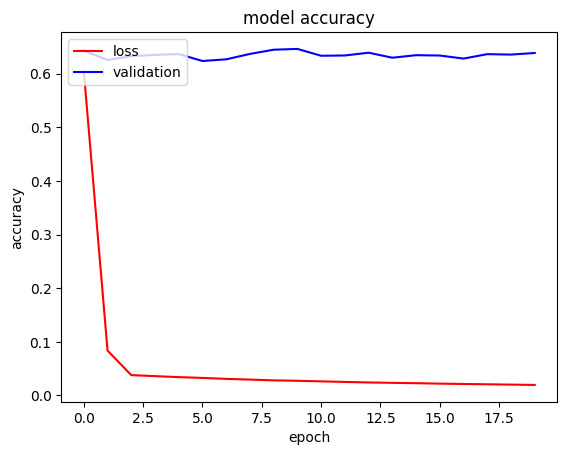

In [23]:

from matplotlib import pyplot as plt

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

epochs_plot = [i for i in range(epochs)]


plt.plot(epochs_plot, loss_plot , color="red", label = "loss")
plt.plot(epochs_plot, f1_score_plot, color="blue", label = "validation")

plt.legend(loc='upper left')

plt.show()


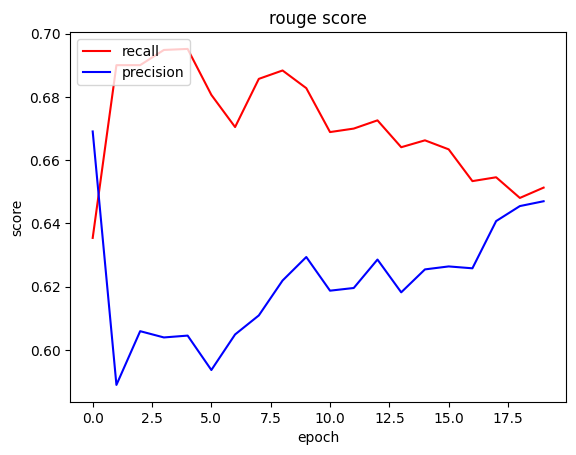

In [24]:

from matplotlib import pyplot as plt

plt.title('rouge score')
plt.ylabel('score')
plt.xlabel('epoch')

epochs_plot = [i for i in range(epochs)]

plt.plot(epochs_plot, recall_plot, color="red", label = "recall")
plt.plot(epochs_plot, precision_plot, color="blue", label = "precision")

plt.legend(loc='upper left')

plt.show()


In [29]:
output_file = 'result.pickle'


y_pred_list =[]
idx_list=[]

key_query_task="business"

X_test = np.array([np.array(val) for val in query_test_sets[key_query_task]["X_test"]])


y_preds = maml.meta_model.predict(X_test, verbose=0)



for j in range(len(y_preds)):
    idx = []
    for i in range(len(y_preds[j])):
        pred_percent = y_preds[j][i]
        if(pred_percent > 0.5):
            idx.append(i)
    if len(idx) < 5.0:
        idx = np.argsort(y_preds[j][-5:])
    idx = sorted(idx)
    idx_list.append(idx)

val_sets = train_test_sets[key_query_task]["test"]

#retrieve summary pairs
df_text_clean = val_sets["text_clean"]
pred_summaries = []
for doc in range(len(idx_list)):
    pred_summary_sentences_list = []
    text_clean = np.array(df_text_clean.iloc[doc])
    idx_doc = idx_list[doc]
    for i in range(len(text_clean)):
        if(i in idx_doc):
            sentence = text_clean[i]
            pred_summary_sentences_list.append(sentence)

    pred_summary = " ".join(pred_summary_sentences_list)
    pred_summaries.append(pred_summary)


df_gold = val_sets["Summary"]

gold_summaries = [df_gold.iloc[m] for m in range(len(df_gold))]




summaries_comp = tuple(zip(pred_summaries, gold_summaries))


#calculate rouge score
scores = calc_rouge_scores(pred_summaries, gold_summaries,
                                  keys=['rouge1', 'rougeL'], use_stemmer=True)

results_dict ={'summaries_comp': summaries_comp,
               'sent_index_number': idx, 'Rouge': scores, 'mod_summary': maml.meta_model.summary()}

with open(output_file, 'wb') as handle:
    pickle.dump(results_dict, handle)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 246, 256)          644096    
 al)                                                             
                                                                 
 dense (Dense)               (None, 246, 1)            257       
                                                                 
 reshape (Reshape)           (None, 246)               0         
                                                                 
Total params: 644353 (2.46 MB)
Trainable params: 644353 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
result = pd.read_pickle("result.pickle")
print(result["Rouge"])
print("\nPrediction\n")
print(result["summaries_comp"][0][0])
print("\nReal summary\n")
print(result["summaries_comp"][0][1])

{'rouge1': {'recall': 0.6513142885088123, 'precision': 0.64700147447151, 'f1': 0.6385816518458169}, 'rougeL': {'recall': 0.43395578784757544, 'precision': 0.43405980234377783, 'f1': 0.42652667772984937}}

Prediction

 British energy firm Burren Energy has been awarded two potentially lucrative oil exploration contracts in Egypt. 

The company successfully bid for the two contracts, granted by government owned oil firms, covering onshore and offshore areas in the Gulf of Suez. Burren Energy already has a presence in Egypt, having been awarded an exploration contract last year. The firm, which floated in 2003, recently announced a deal to buy 26% of Indian firm Hindustan Oil Exploration. The £13.8m deal gives Burren Energy access to the Indian oil and gas industry.

Real summary

British energy firm Burren Energy has been awarded two potentially lucrative oil exploration contracts in Egypt.Burren Energy already has a presence in Egypt, having been awarded an exploration contract last yea